# Medical Image Segmentation: Random Walker

Please first check if matplotlib, skimage, and scipy packages are installed. The random walker algorithm is a very simple but powerful instrument for medical image segmentation. It can be used as it is or in combination with other segmentation methods. This exercise will train you to apply the random walker for the segmentation of 2D images.

Note that you are ALLOWED to use functions from scipy, skimage, matplotlib, and numpy Python packages.

During the execution of each subtask, you will program individual functions that can be used in the following subtasks.

# Exercise

The code below will download a 3D head-and-neck (HaN) computed tomography image and 2D cell image. The HaN image is accompanied by a mask with seed points labeling the mandible and a mask with seed points labeling the background. Similarly, the cell image is accompanied by a mask with seed points labeling individual cells and a mask with seed points labeling the background.

The code also shows how to visualize some cross-section of the HaN image.

Please be sure that you correctly specified the path to the data for this assignment.

In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# change to relevant directory
root_path = 'gdrive/My Drive/KU/MIA'  #change dir to your project folder
os.chdir(root_path)

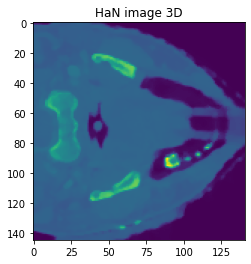

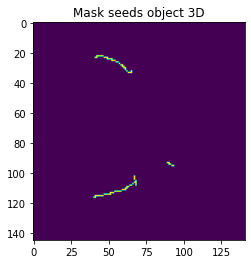

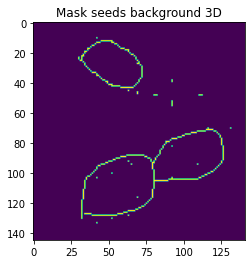

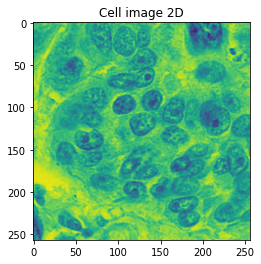

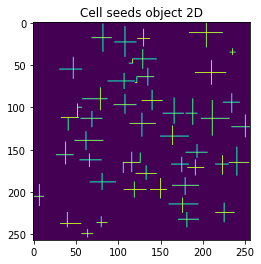

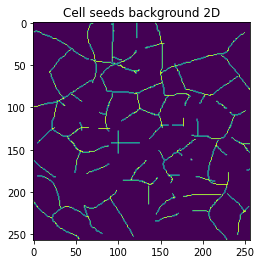

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# ADD NEEDED SUBMODULES
import skimage as skimage

# ADD NEEDED SUBMODULES
import scipy as sp
%matplotlib inline 

HaN_imageArray = np.load('Data2/HaN_original.npy')
# Mask with seed points labeling the mandible
HaN_objectMask = np.load('Data2/HaN_mandible.npy')
# Mask with seed points labeling the background
HaN_backgroundMask = np.load('Data2/HaN_background.npy')

cell_imageArray = np.load('Data2/cellOriginal.npy')
cell_objectMask = np.load('Data2/cellObject.npy')
cell_backgroundMask = np.load('Data2/cellBackground.npy')

plt.figure(1)
plt.imshow(HaN_imageArray[:, :, 47])
plt.title("HaN image 3D")
plt.figure(2)
plt.imshow(HaN_objectMask[:, :, 47])
plt.title("Mask seeds object 3D")
plt.figure(3)
plt.title("Mask seeds background 3D")
plt.imshow(HaN_backgroundMask[:, :, 47])

plt.figure(4)
plt.imshow(cell_imageArray)
plt.title("Cell image 2D")
plt.figure(5)
plt.title("Cell seeds object 2D")
plt.imshow(cell_objectMask)
plt.figure(6)
plt.title("Cell seeds background 2D")
plt.imshow(cell_backgroundMask)


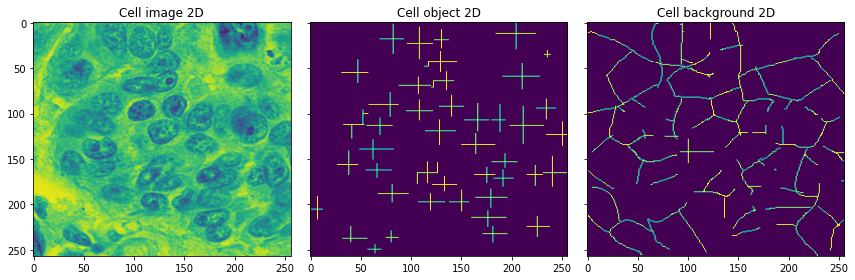

In [5]:
# Visualization functions

def visualize_images(subimgs, subtitles=None, 
                     nrows=1, ncols=None, figsize=None, 
                     save=False, filename=""):
  # Adapt columns
  if ncols==None:
    ncols=len(subimgs)
  # Create figure
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, sharex=True, sharey=True)
  # Create subplots
  for i, (ax, img) in enumerate(zip(axes.flatten(), subimgs)):
    ax.imshow(img, aspect="auto")
    # Add titles to each subplot
    if subtitles != None:
      ax.set_title(subtitles[i])
  # Set output
  fig.tight_layout()
  if save==True:
    plt.savefig("./Week3/plots_handin2/" + filename + ".png", dpi=300)
  plt.show()  

def visualize_han(han_image, start=0, stop=6, step=1, save=False, filename=""):
  # Adapt figsize
  nplots = int((stop-start) / step)
  if nplots < 6:
    ncols = nplots
    nrows = 1
  else:
    ncols = 6
    nrows = nplots // ncols
  # Plot
  han_images = [han_image[:, :, 47+i] for i in range(start,stop,step)]
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, 
                           subplot_kw=dict(aspect='equal'), figsize=(16,3*nrows))  
  for i, (ax, img) in enumerate(zip(axes.flatten(), han_images)):
    ax.imshow(img, aspect="auto")  
    ax.set_title(f"Slice {47+start+i*step}")
  fig.tight_layout()
  if save==True:
    plt.savefig("./Week3/plots_handin2/" + filename + ".png", dpi=300)
  plt.show()  

cell_imgs = cell_imageArray, cell_objectMask, cell_backgroundMask
cell_titles = "Cell image 2D", "Cell object 2D", "Cell background 2D"
visualize_images(cell_imgs, cell_titles, figsize=(12,4))

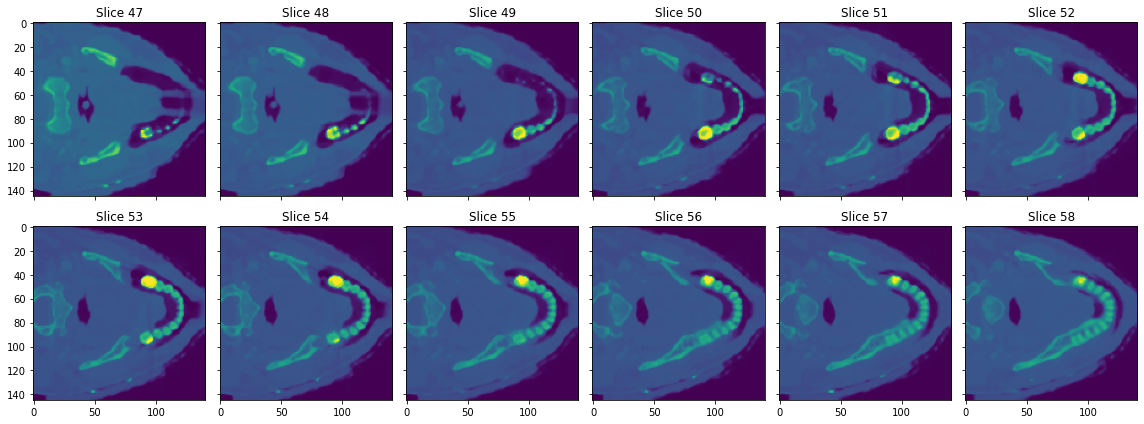

In [6]:
visualize_han(HaN_imageArray, start=0, stop=12, step=1)

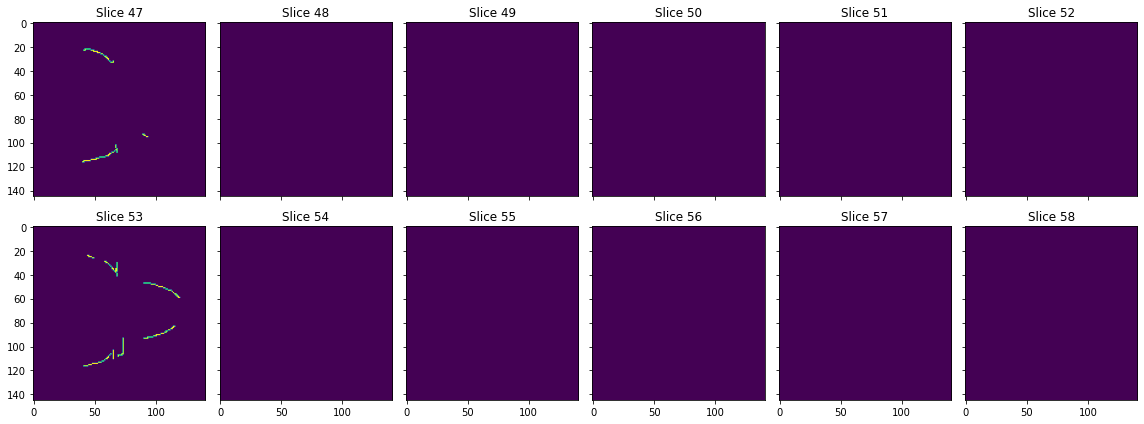

In [7]:
visualize_han(HaN_objectMask, start=0, stop=12, step=1)

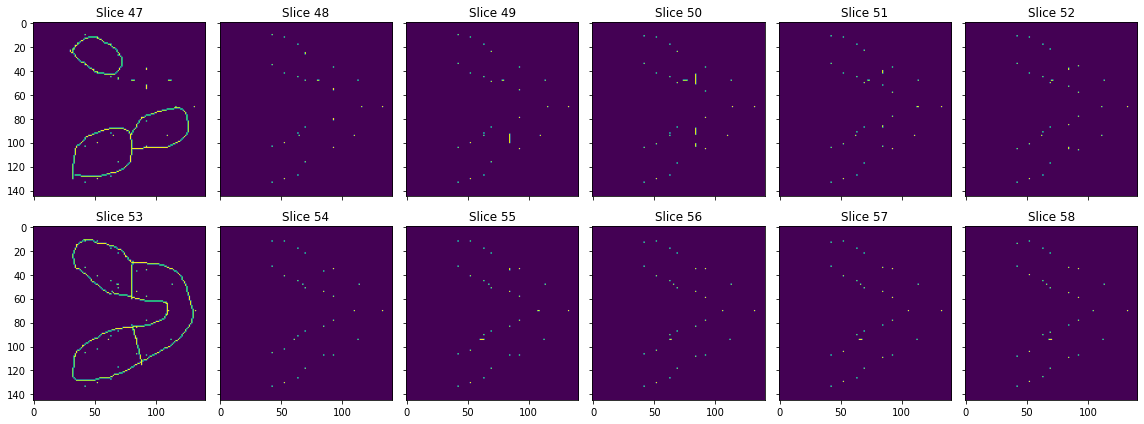

In [8]:
visualize_han(HaN_backgroundMask, start=0, stop=12, step=1)

# Random walker in 2D

In [9]:
# CCD function implemented in the previous notebook

def growing(I, V, y, q, t):
  # Look behind and above y
  i,j = y
  if i-1 > 0:
    z = i-1,j
    check_z(I, V, z, q, t)
  if j-1 > 0:
    z = i,j-1
    check_z(I, V, z, q, t)
  # Look below and front y
  if i+1 < I.shape[0]:
    z = i+1,j
    check_z(I, V, z, q, t)
  if j+1 < I.shape[1]:
    z = i,j+1
    check_z(I, V, z, q, t)

def check_z(I, V, z, q, t):
  if I[z] == 1 and V[z] == 0:
      q.append(z)
      V[z] = t

def ccd(image_array):
  I = image_array 
  V = np.zeros(I.shape)
  q = []
  t = 1
  for i in range(I.shape[0]):
    for j in range(I.shape[1]):
      x = i,j
      if I[x] == 1 and V[x] == 0:
        c = 1
        # Append the first pixel to the queue
        q.append(x)
        # Label the first connected component in V
        V[x] = t
        # Until the queue isn't empty do
        while len(q) > 0:
          # Take the first element in the queue and look at neighbours
          y = q.pop()
          c += 1
          growing(I, V, y, q, t)
        t += 1
  return V

Exercise 1.1. Implement the random walker algorithm for the segmentation of cells from the provided 2D image. It is important to note that cells need to be segmented as individual objects, i.e. each cell should have its own label. The connected seed points from "cellObject.npy" correspond to individual cells.

Exercise 1.2. Visualize borders of individual cells after performing segmentation. Hint: check morphological operations for an idea of how to visualize borders.

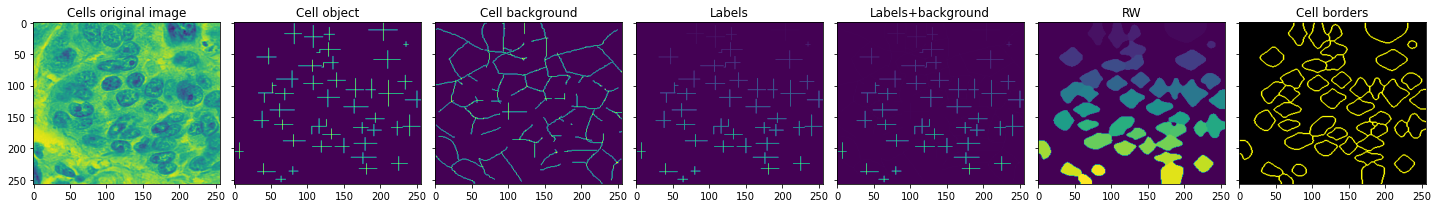

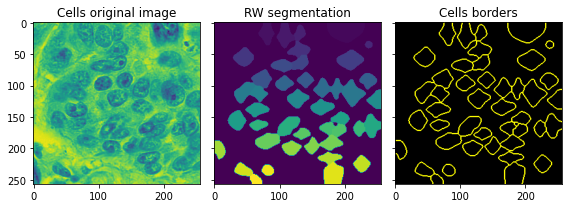

In [10]:
from skimage import measure
from scipy import ndimage

from skimage.segmentation import random_walker
from skimage.segmentation import mark_boundaries
from skimage.segmentation import clear_border

# Use connected component decomposition from the previous assignment for generating seeds for individual cells
object_background = cell_objectMask + cell_backgroundMask
seeds = ccd(cell_objectMask)
final_seeds = seeds*2 + cell_backgroundMask

# Segmentation of 2D arrays
rw = random_walker(cell_imageArray, final_seeds, beta=10)

# Visualization for cell borders
cell_borders = mark_boundaries(rw, rw)

cell_imgs = cell_imageArray, cell_objectMask, cell_backgroundMask, seeds, final_seeds, rw, cell_borders
cell_titles = "Cells original image", "Cell object", "Cell background", "Labels", "Labels+background", "RW", "Cell borders"
visualize_images(cell_imgs, cell_titles, figsize=(20,3))

cell_imgs = cell_imageArray, rw, cell_borders
cell_titles = "Cells original image", "RW segmentation", "Cells borders"
visualize_images(cell_imgs, cell_titles, figsize=(8,3), save=True, filename="RW_2D")

# Random walker in 3D

Exercise 1.3. Implement the random walker algorithm for the segmentation of mandible from 3D HaN CT images. The input is the CT image and binary seed masks of mandible and background. In contrast to cell segmentation, there is only one target object in this assignment. The segmentation should be performed in 3D and not by separating the 3D image into 2D slices. The segmentation may take a very long time if the wrong parameters are selected. Be sure to specify beta = 10000 and mode = 'cg_mg' when you call the random walker algorithm from skimage.

Exercise 1.4. Visualize the mandible segmentation results for z-slices of 10, 50, 55, and 60. Please check how the reference segmentation mask is visualized at the beginning of the exercise.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: pyamg (http://pyamg.github.io/)) is needed to use
                this mode, but is not installed. The 'cg' mode will be used
                instead.
  This is separate from the ipykernel package so we can avoid doing imports until


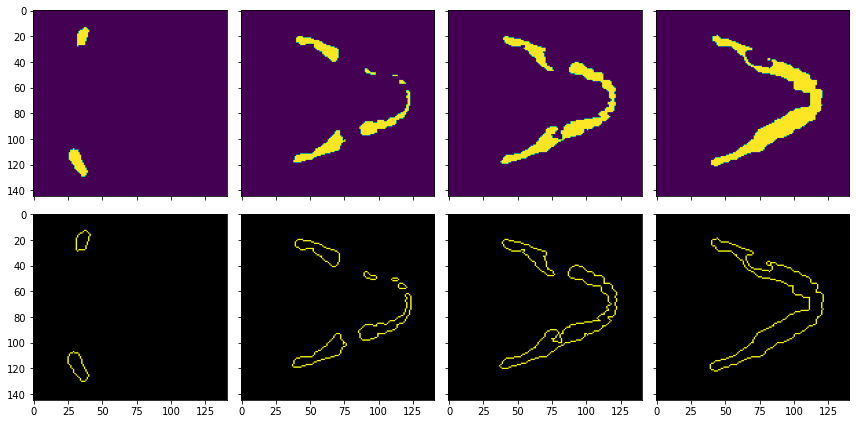

In [11]:
# Segmentation of 3D arrays
seeds = HaN_objectMask*2 + HaN_backgroundMask
rw = random_walker(HaN_imageArray, seeds, beta=10000, mode='cg_mg')

# Visualization of mandible borders
imgs = [rw[:,:,n] for n in (10,50,55,60)]
imgs_boundary = [mark_boundaries(img, clear_border(img)) for img in imgs]
imgs2 = imgs + imgs_boundary
visualize_images(imgs2, nrows=2, ncols=4, figsize=(12,6), save=True, filename="RW_3D")